In [90]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [91]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [92]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [93]:
df = pd.DataFrame(iris.data, columns = iris.feature_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
df['target'] = iris.target # target value is 0,1,2 which means that 3 flowers
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [95]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis = 'columns'), iris.target, test_size = 0.2)

In [97]:
len(x_train)

120

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [99]:
model.score(x_test, y_test)

0.9666666666666667

In [104]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

In [106]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 8,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 12]])

Text(95.72222222222221, 0.5, 'Truth')

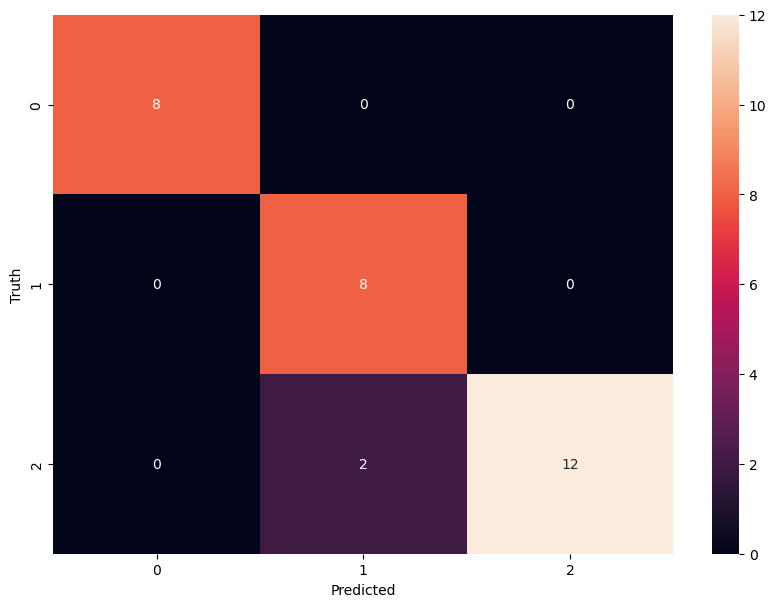

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")